In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Data import
data = pd.read_csv('/content/Cust_Spend_Data.csv')
data.shape

(10, 7)

In [ ]:
# data sample
data.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          10 non-null     int64 
 1   Name             10 non-null     object
 2   Avg_Mthly_Spend  10 non-null     int64 
 3   No_Of_Visits     10 non-null     int64 
 4   Apparel_Items    10 non-null     int64 
 5   FnV_Items        10 non-null     int64 
 6   Staples_Items    10 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 688.0+ bytes


In [ ]:
data.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.00000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,5.50000,4850.000000,4.000000,0.300000,4.3000,4.00000
std,3.02765,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1.00000,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,3.25000,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5.50000,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,7.75000,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10.00000,10000.000000,7.000000,1.000000,12.0000,9.00000


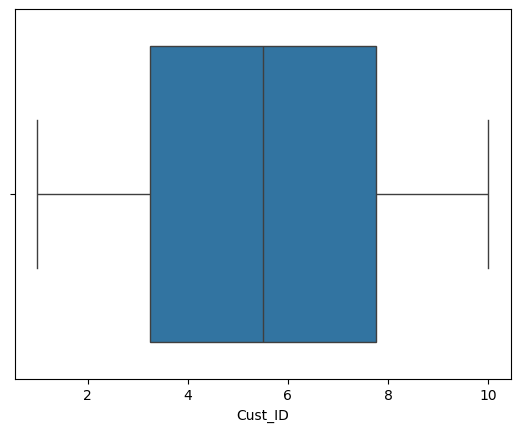

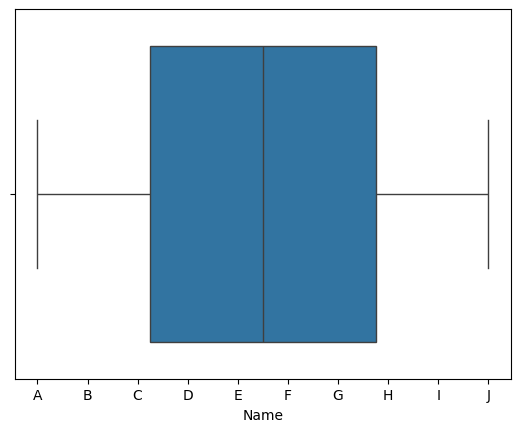

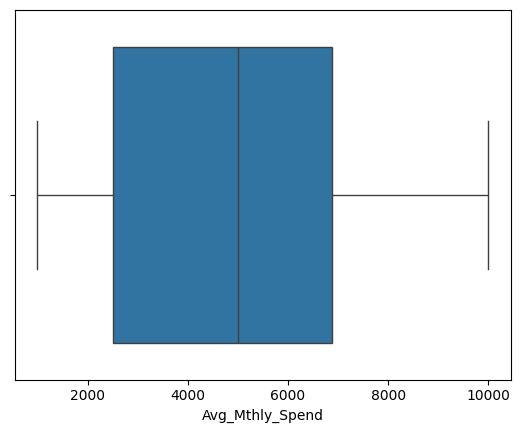

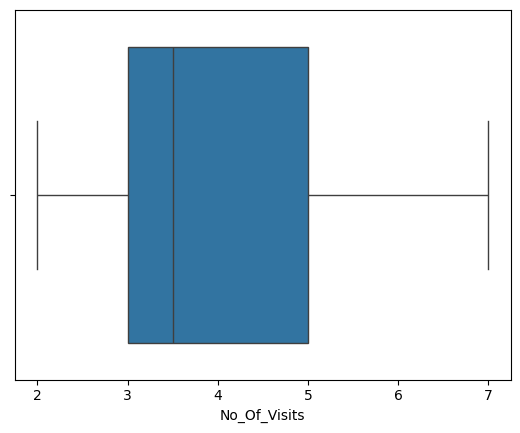

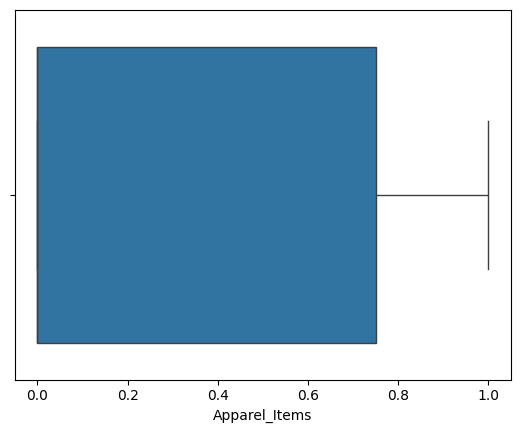

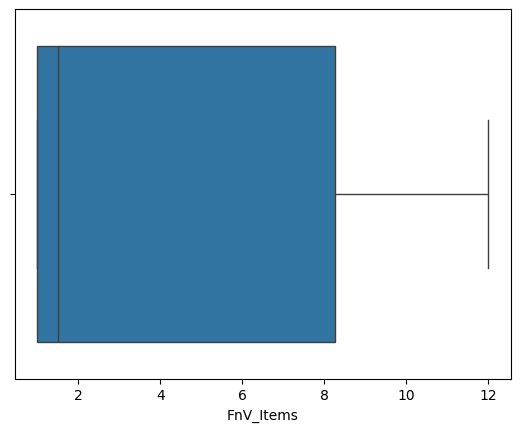

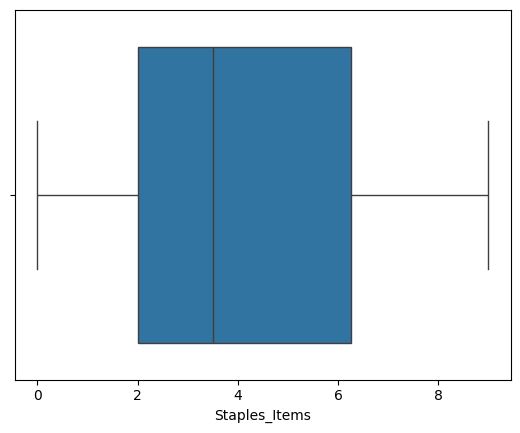

In [ ]:
for cols in data:
    sns.boxplot(data[cols], orient='h')
    plt.show()

In [ ]:
# Separating the data for scaling
edata = data.iloc[:, 2:7]

# scaling the data
scale = StandardScaler()
scaled_data = scale.fit_transform(edata)

In [ ]:
scaled_data = pd.DataFrame(scaled_data, columns=edata.columns)

In [ ]:
scaled_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [ ]:
# Optimum number of clusters - WSS plot

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

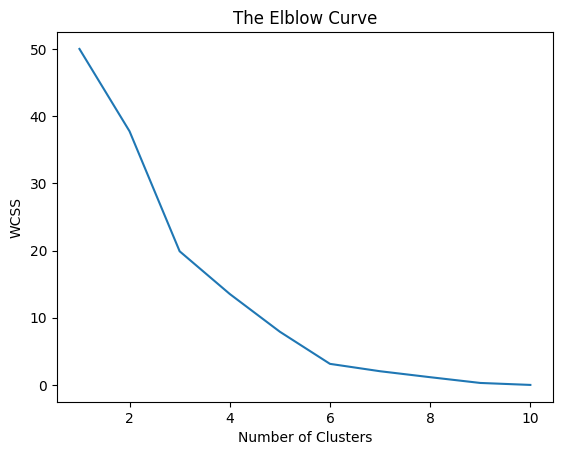

In [ ]:
# Elbow Plot
plt.plot(range(1, 11), wcss)
plt.title('The Elblow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Creating algo for 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42, n_init='auto')
ykmeans = kmeans.fit_predict(scaled_data)

# Starting the cluster number from 1 instead of 0
ykmeans = ykmeans+1

# new dataframe as cluster
cluster = pd.DataFrame(ykmeans)

# addig cluster to the raw data
data['cluster'] = cluster
edata['cluster'] = cluster

In [ ]:
data

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,1,A,10000,2,1,1,0,3
1,2,B,7000,3,0,10,9,1
2,3,C,7000,7,1,3,4,3
3,4,D,6500,5,1,1,4,3
4,5,E,6000,6,0,12,3,1
5,6,F,4000,3,0,1,8,2
6,7,G,2500,5,0,11,2,1
7,8,H,2500,3,0,1,1,2
8,9,I,2000,2,0,2,2,2
9,10,J,1000,4,0,1,7,2


In [ ]:
# Mean of the data based on the cluster
kmeans_cluster = pd.DataFrame(round(edata.groupby('cluster').mean(),1))
kmeans_cluster

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,
1,5166.7,4.7,0.0,11.0,4.7
2,2375.0,3.0,0.0,1.2,4.5
3,7833.3,4.7,1.0,1.7,2.7
